<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [4]:
#Confirming data is splitting into 60, 20 and 20
print(len(x_train))
print(len(x_test))
print(len(x_cv))

3000
1000
1000


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [5]:
clf = SVC(gamma=0.001, C=100)
clf.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

In [25]:
print((intercept))

[3.24961764]


In [18]:
import math


y_i_multiply_alpha_i = clf.dual_coef_
intercept = clf.intercept_
sp_vector = clf.support_vectors_
gamma=0.001

In [34]:
print(len(X))
print(len(sp_vector))
print(len(y_i_multiply_alpha_i[0]))
print(sp_vector[1,:])

5000
544
544
[-0.78737776  0.32314635 -0.05618474 -0.05476434  0.4440335 ]


In [55]:
def decision_function(x_cv,sp_vector,gamma,X,intercept):
    dec_function = []
    pred_function = []
    for xq in x_cv:
        temp_before_intercept=0
        for j in range(len(sp_vector)):
            kernel_value = math.exp(-gamma* np.dot(sp_vector[j, :] - xq, sp_vector[j, :] -xq ))
            temp_before_intercept = temp_before_intercept + ((y_i_multiply_alpha_i[0][j])*kernel_value)
        dec_fun = temp_before_intercept+intercept
        dec_function.append(dec_fun[0])
        if dec_fun<0:
            pred_function.append(0)
        else:
            pred_function.append(1)
    return dec_function,pred_function
decision_function_result, prediction_function_result= decision_function(x_cv,sp_vector,gamma,X,intercept)

In [52]:
decion_result_from_Model = clf.decision_function(x_cv)

In [53]:
print(decion_result_from_Model)

[ 1.82663169e+00 -2.81732637e+00 -2.69782923e+00  1.62040386e+00
 -1.95224262e+00 -2.46032879e+00  1.23655017e-01 -2.84062741e+00
 -5.43505383e+00 -8.94987437e-01  8.23745325e-01 -2.47093437e+00
 -2.00172332e+00 -6.12007504e-01 -2.57893981e+00 -3.31755002e+00
 -2.46572014e+00 -2.75959410e+00  2.58544203e+00 -9.51187852e-01
 -2.70155938e+00 -2.35862683e+00  1.20779395e+00  1.77790083e+00
  9.76973852e-01  1.70084946e+00 -1.66489538e+00 -4.20394010e+00
 -3.66408475e+00 -3.49810897e+00 -3.38645381e+00 -2.63740851e+00
  1.54633597e+00  1.95880857e+00 -3.76771651e+00 -2.21837381e+00
 -3.35987050e+00  1.80856839e+00  1.38365762e+00 -2.57900820e+00
 -3.01896462e+00 -1.33954670e+00 -4.03296317e+00 -3.25824428e+00
 -1.27784357e+00 -1.35412081e+00 -2.17854328e+00  9.68681563e-01
  1.89265569e+00  1.62633556e+00 -1.86526133e+00 -3.62885616e+00
 -2.97944648e+00 -2.39654832e+00 -2.67765238e+00 -9.91631564e-01
 -2.61895735e+00 -3.34736264e+00 -1.06500945e+00  5.78335673e-01
 -7.44787165e-01 -2.44118

In [56]:
print(decision_function_result)

[1.8266316851407383, -2.817326367451544, -2.6978292349868425, 1.620403855322961, -1.952242615325504, -2.460328789712777, 0.12365501679495461, -2.84062740503157, -5.43505382640072, -0.8949874367109643, 0.8237453253471316, -2.470934371935529, -2.0017233242766266, -0.6120075037798656, -2.578939805211108, -3.3175500154237496, -2.465720139867558, -2.75959409753692, 2.5854420331451835, -0.9511878515746459, -2.701559384100166, -2.3586268291535233, 1.2077939525345571, 1.777900828850845, 0.9769738520928528, 1.7008494613193492, -1.6648953818047132, -4.203940100263127, -3.6640847541005015, -3.498108972971211, -3.3864538103504045, -2.637408513958307, 1.5463359728075816, 1.9588085724050317, -3.7677165136118744, -2.2183738086269655, -3.359870497203873, 1.8085683880409094, 1.3836576246812187, -2.579008203456483, -3.018964615194663, -1.3395466980417736, -4.032963169733494, -3.2582442822195943, -1.2778435680851188, -1.3541208083856318, -2.1785432789229886, 0.9686815634105685, 1.8926556903195988, 1.6263

## Result from Model decion function(decision_result_from_Model) and Custom decision function(decision_function_result) is same.

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__

# NOTE: Most of the code copied from SGD Assignment

In [62]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w.T)+b)))

In [63]:
def logloss(w,x,y,b):
    sigmoid_func_val=sigmoid(w,x,b)
    return -np.mean(y*np.log10(sigmoid_func_val)+(1-y)*np.log10(1-sigmoid_func_val))

In [65]:
one_count=list(y_cv).count(1)
zero_count=list(y_cv).count(0)      # calculating y+ and y_
y_plus=(one_count+1)/(one_count+2)
y_minize=1/(zero_count+2)

In [66]:
def update_function(y_cv,y_plus,y_minize):
    update_cv=[]
    for xq in y_cv:    # update function convert y_cv into y+,y_
        if xq==1:
                update_cv.append(y_plus)
        else:
              update_cv.append(y_minize)
    return(np.array(update_cv))        

In [67]:
y_cv_updated=update_function(y_cv,y_plus,y_minize)

In [68]:
f_cv = np.array(decision_function_result)

In [70]:
w = np.zeros_like(f_cv[0])# initial weight vector
b = 0      # initial intercept value
eta0  = 0.0001  # learning rate
alpha = 0.0001 # lambda value
N = len(f_cv)

In [71]:
initial_logLoss=logloss(w,f_cv,y_cv_updated,b)
print("Initial log loss = "+str(initial_logLoss))

Initial log loss = 0.3010299956639812


In [74]:
def sgd_algorithm(f_cv,y_cv,eta0,alpha,w,b,epoch):
    t=0.001 # tolerence
    test_loss=[]
    epoc=[]
    for i in  range(0,epoch): 
        epoc.append(i)
        for j in range(0,N):
            reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = ((1-eta0*(alpha/N))*w)+((eta0*f_cv[j])*(y_cv[j]-sigmoid(w,f_cv[j],b))) # updating weight vector
            b = b+(eta0*(y_cv[j]-sigmoid(w,f_cv[j],b)))       # updatind intercept    
        test=logloss(w,f_cv,y_cv,b)
        test_loss.append(test)
        if i<=t :
            continue                                                                  
            if abs(test_loss[i]-test_loss[i-1])>t: # block to check convergence
                continue
            else:
                break 
    return w,b,epoc,test_loss

In [75]:
epoch=45
weigh,intercept,epo,loss=sgd_algorithm(f_cv,y_cv_updated,eta0, alpha,w,b,epoch)
print("optimal weight = "+str(weigh))
print("optimal intercept = "+str(intercept))

optimal weight = 1.1341374685479424
optimal intercept = -0.15205591096493967


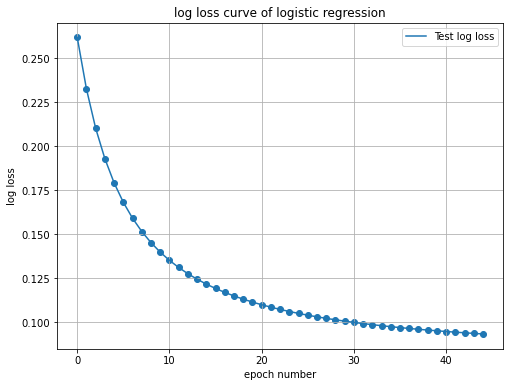

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epo,loss, label='Test log loss')
plt.scatter(epo,loss)
plt.title('log loss curve of logistic regression')
plt.xlabel('epoch number')
plt.ylabel("log loss")
plt.legend()

In [79]:
def decision_function_updated(x_cv,sp_vector,gamma,X,intercept):
    dec_function = []
    pred_function = []
    for xq in x_cv:
        temp_before_intercept=0
        for j in range(len(sp_vector)):
            kernel_value = math.exp(-gamma* np.dot(sp_vector[j, :] - xq, sp_vector[j, :] -xq ))
            temp_before_intercept = temp_before_intercept + ((y_i_multiply_alpha_i[0][j])*kernel_value)
        dec_fun = temp_before_intercept+intercept
        dec_function.append(dec_fun)
        if dec_fun<0:
            pred_function.append(0)
        else:
            pred_function.append(1)
    return dec_function,pred_function

In [80]:
decision_function_result_test, prediction_function_result_test= decision_function_updated(x_test,sp_vector,gamma,X,intercept)

In [81]:
def probability(test_decision_function,w,b):
    p=1/(1+np.exp(-w*test_decision_function+b)) # to calculate probilty P(Y=1|X)
    return p

In [84]:
decision_function_result_test_array = np.array(decision_function_result_test)

In [85]:
prob=probability(decision_function_result_test_array,weigh,intercept)
print(prob[:10])

[0.00187226 0.03738934 0.14849549 0.002403   0.0004931  0.00078078
 0.14377814 0.00024938 0.00617872 0.03005372]



If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
